<a href="https://colab.research.google.com/github/ellenrpaes/Data_Science_Projects/blob/master/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<img alt="Colaboratory logo" width="100%" src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/cartao%20fraude.png?raw=true">


#### **DETECÇÃO DE FRAUDES EM CARTÕES DE CRÉDITO**
*by [Ellen Paes](https://www.linkedin.com/in/ellenpaes)*


---

De acordo com o The Nilson Report, uma publicação líder global de comércio de cartões e pagamentos móveis e uma respeitada fonte de notícias deste segmento, em 2023 projeta-se um consumo com cartões de crédito no mundo de **57** trilhões de dólares e uma projeção de fraudes em **35,7** bilhões de dólares.

<p align=center>
<img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/Dados_NR.PNG?raw=true" width="100%"></p>

Como podemos observar nos gráficos publicados pela The Nilson Report e reproduzidos acima, teremos aumentos substanciais de transações ocorrendo ao redor do mundo até 2028, principalmente na Ásia / Pacífico que contempla os países da Oceânia, Extremo Oriente e Sul da Ásia.

Naturalmente as projeções para aumento de fraudes apresenta um crescimento que representa perdas expressivas para os negócios com projeções até $40 bilhões de dólares. No entanto, observa-se que a cada 100 dólares gasto dentro dessa projeção até 2027, haverá uma redução do valor que será desviado o que indica o esforço do segmento em promover iniciativas que visem combater as fraudes, sendo algumas citadas abaixo:

*   Orientações aos usuários de cartões de crédito.
*   Uso de tokens e pins durante as transações.
*   Uso de ténicas avançadas de análise de dados, como Machine Learning para detectar possíveis transações fraudulentas e bloqueios preventivos do cartão.

Importante citar que no caso da utilização de Machine Learning, é extremamente impotante que o desenvolvedor desta solução esteja atento a qualidade dos dados coletados e busque um modelo de classificação que evite ao máximo possível que usuário honesto passe por uma experiência negativa de ter uma compra negada.
Vale destacar que a aplicação de machine learning como soluções de prevenção à fraude existem há bastante tempo, desde a década de noventa o que mudou nesse período foram as técnicas e a robustez com que os algoritmos passaram a ser aplicados e combinados para gerar aprendizado e agilidade no processamento de milhares de transações que ocorrem todos os dias.




## **Importando os Dados**

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações o que torna o conjunto extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por [V1, V2, V3 ... V28]  após ter sido aplicado uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA), que trata-se de uma técnica que permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados componentes que podem ser um número menor ou igual às variáveis originais.

Tanto o dataset quanto algumas informações adicionais sobre esse conjunto de dados podem ser localizados no [Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud).


Abaixo, segue a importação das bibliotecas importantes que serão utilizadas durante esse projeto.

In [ ]:
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# Importando as bibliotecas necessãrias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
svc = SVC()
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.tree import export_graphviz
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from imblearn.under_sampling import RandomUnderSampler

from collections import Counter
from IPython.display import Image  
import pydotplus

# Configuring the notebook
sns.set()
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Como podemos observar através das 5 primeiras linha do dataset, as variáveis `Time` e `Amount` não passaram por nenhum processo de transformação.

In [ ]:
# importar os dados para um dataframe
df = pd.read_csv("https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1")

# verificando as 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Através do código abaixo, podemos identificar o tamanho do nosso dataset, a quantidade de colunas existentes, o tipo de dados e a quantidade de dados não nulos. Já é um bom indício para explorar sobre dados faltantes.

In [ ]:
# Verificando o tamanho do dataset

print('Informações sobre o dataset')
print('Variáveis:\t{}'.format(df.shape[1]))
print('Entradas:\t{}'.format(df.shape[0]))

# Identificando os tipos de variáveis
display(df.info())

Informações sobre o dataset
Variáveis:	31
Entradas:	284807
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  fl

None

Já era possível observar que não havia existência de dados nulos, mas o código abaixo tem também o mesmo efeito e pode ser rapidamente acionado.

In [ ]:
# ver se há valores ausentes
df.isnull().sum().max()

0

Usando o método `describe()` podemos visualizar a distribuição estatística do dataframe. Utilizando esse método, temos informações que podem nos ajudar a:

* Identificar outliers.
* Entender melhor a distribuição dos dados.
* Identificar falhas na distribuição dos dados.
* Após a limpeza dos dados, verificar a eficácia e as diferenças entre os dados tratados e não tratados.

No entanto, para este conjunto de dados aplicaremos essa funcionalidade para as duas variáveis que não estão transformadas que é `Time` e `Amount`.
Para a variável `Time` (tempo em segundos) não foi possível identificar discrepâncias aparentes. Em relação à variável `Amount`, nota-se que o valor médio de transações (considerando ambas as classes) é 88.34, mediana igual a 22.00 e desvio padrão de 250.12. Atingindo o valor máximo de 25691.16, a maioria das transações financeiras é composta em sua maioria por quantias menores - como esperado.

**Relembrando alguns conceitos básicos de Estatística Descritiva:**

<p align=center>
<img src="https://github.com/ellenrpaes/Datasets_and_Images/blob/master/ED.PNG?raw=true" width="100%"></p>





In [ ]:
df[['Time', 'Amount']].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


Como podemos ver no gráfico abaixo, trata-se de um conjunto com dados desbalanceados, pois o evento fraude apresenta frequência de ocorrência muito menor que o evento normal. Esse é um ponto importante para ser ajustado no momento de iniciar a aplicação de técnicas de machine learning para que não sejam construídos modelos enviesados. Falaremos mais adiante sobre como balancear esses dados.

0    284315
1       492
Name: Class, dtype: int64

Class com fraude representam 0.17% do Dataset.



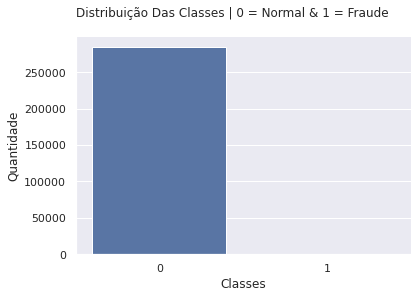

In [ ]:
# checando a distribuição da variável alvo
print(df.Class.value_counts())
print("\nClass com fraude representam {:.2f}% do Dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))

# plotando gráfico de barras
fig, ax = plt.subplots()
sns.countplot('Class', data=df, ax=ax)
ax.set_title('Distribuição Das Classes | 0 = Normal & 1 = Fraude', loc='left', pad=20)
ax.set_xlabel('Classes')
ax.set_ylabel('Quantidade')

sns.despine(fig)
plt.show()

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo `Time`. No entanto, não foi identificada nenhum informação a partir das distribuições de frequência abaixo que pudessem contribuir para a análise.

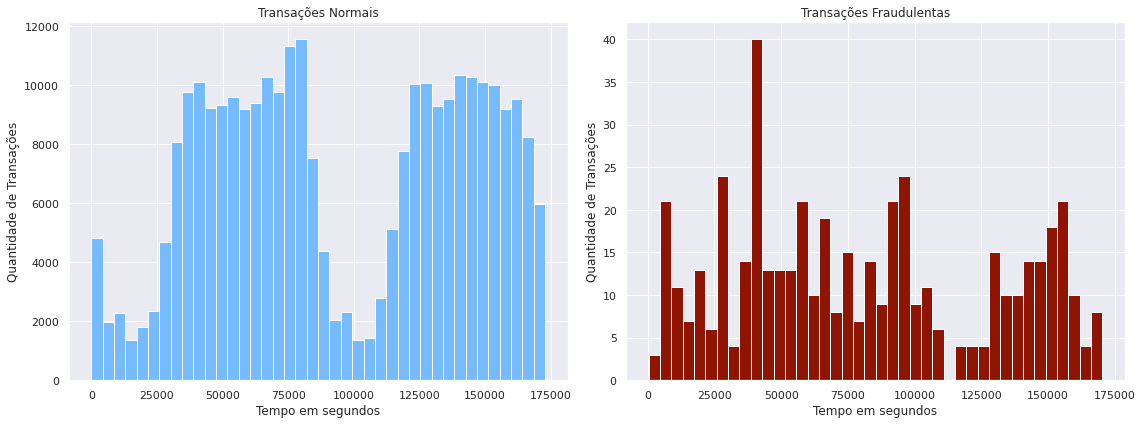

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

num_bins = 40

ax[0].hist(df.Time[df.Class == 0], bins=num_bins, color='#75bbfd')
ax[0].set_title('Transações Normais')
ax[0].set_xlabel('Tempo em segundos')
ax[0].set_ylabel('Quantidade de Transações')

ax[1].hist(df.Time[df.Class == 1], bins=num_bins, color='#8f1402')
ax[1].set_title('Transações Fraudulentas')
ax[1].set_xlabel('Tempo em segundos')
ax[1].set_ylabel('Quantidade de Transações')
plt.tight_layout()

Plotou-se também dois gráficos a fim de comparar as distribuições das 2 classes ao longo da dimensão tempo `Amount`. É possível observar que grande parte das transações fraudulentas se concentram em valores menores.

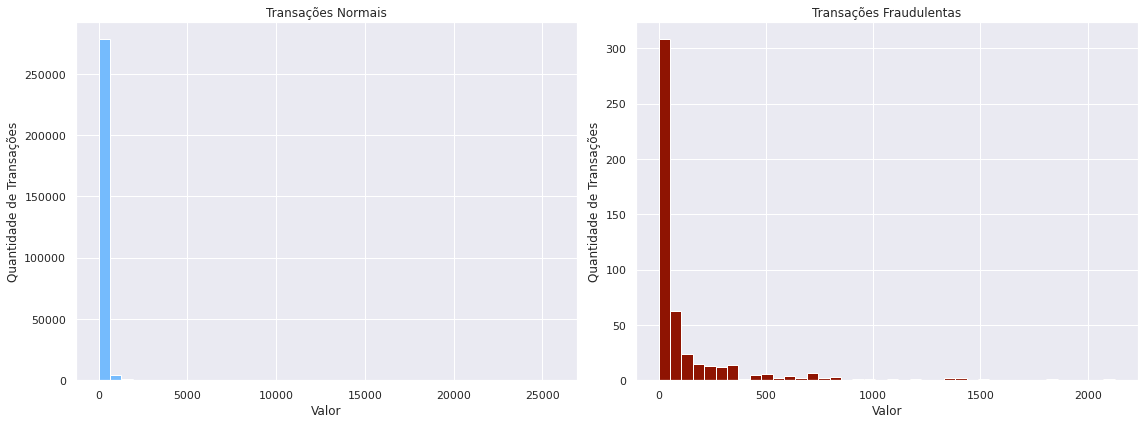

In [ ]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

num_bins = 40

ax[0].hist(df.Amount[df.Class == 0], bins=num_bins, color='#75bbfd')
ax[0].set_title('Transações Normais')
ax[0].set_xlabel('Valor')
ax[0].set_ylabel('Quantidade de Transações')

ax[1].hist(df.Amount[df.Class == 1], bins=num_bins, color='#8f1402')
ax[1].set_title('Transações Fraudulentas')
ax[1].set_xlabel('Valor')
ax[1].set_ylabel('Quantidade de Transações')

plt.tight_layout()

Seguindo a análise exploratória, plotou-se os *boxplots* para ver se há alguma diferença no padrão transações em relação à dimensão `Time` e `Amount`. Para a dimensão `Time` não há comentários relevantes a serem feitos, no entano, para a variável `Amount`, percebe-se uma distribuição diferente para as duas classes, o que provavelmente irá contribuir para o treinamento do modelo de **machine learning**.

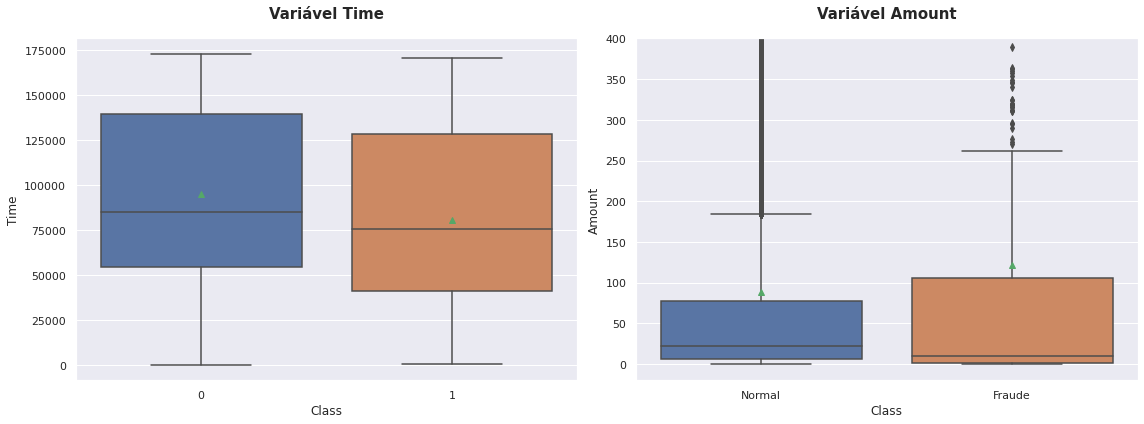

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.boxplot(df.Class, df.Time, showmeans=True, ax=ax[0])
plt.xticks([0, 1], ['Normal', 'Fraude'])
ax[0].set_title('Variável Time',fontsize=15, fontweight='bold',pad=20)

sns.boxplot(df.Class, df.Amount, showmeans=True, ax=ax[1])
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])
ax[1].set_title('Variável Amount',fontsize=15, fontweight='bold',pad=20)

plt.tight_layout()

O gráfico de densidade é muito útil para compararmos as distribuições de cada variável para cada classe e ver quais as mais importantes para detecção de anomalias. O que se procura nesse tipo de visualização são distribuições que diferem uma da outra, permitindo identificar fraudes mais facilmente. Veja como exemplo as variáveis `V3`, `V4`, `V10` , `V11`, `V12`, `V14` e `V17` como elas são bem distintas.
Por outro lado, variáveis como `V8`, `V13` e `V15` são muito similares, apresentando aproximadamente o mesmo comportamento.

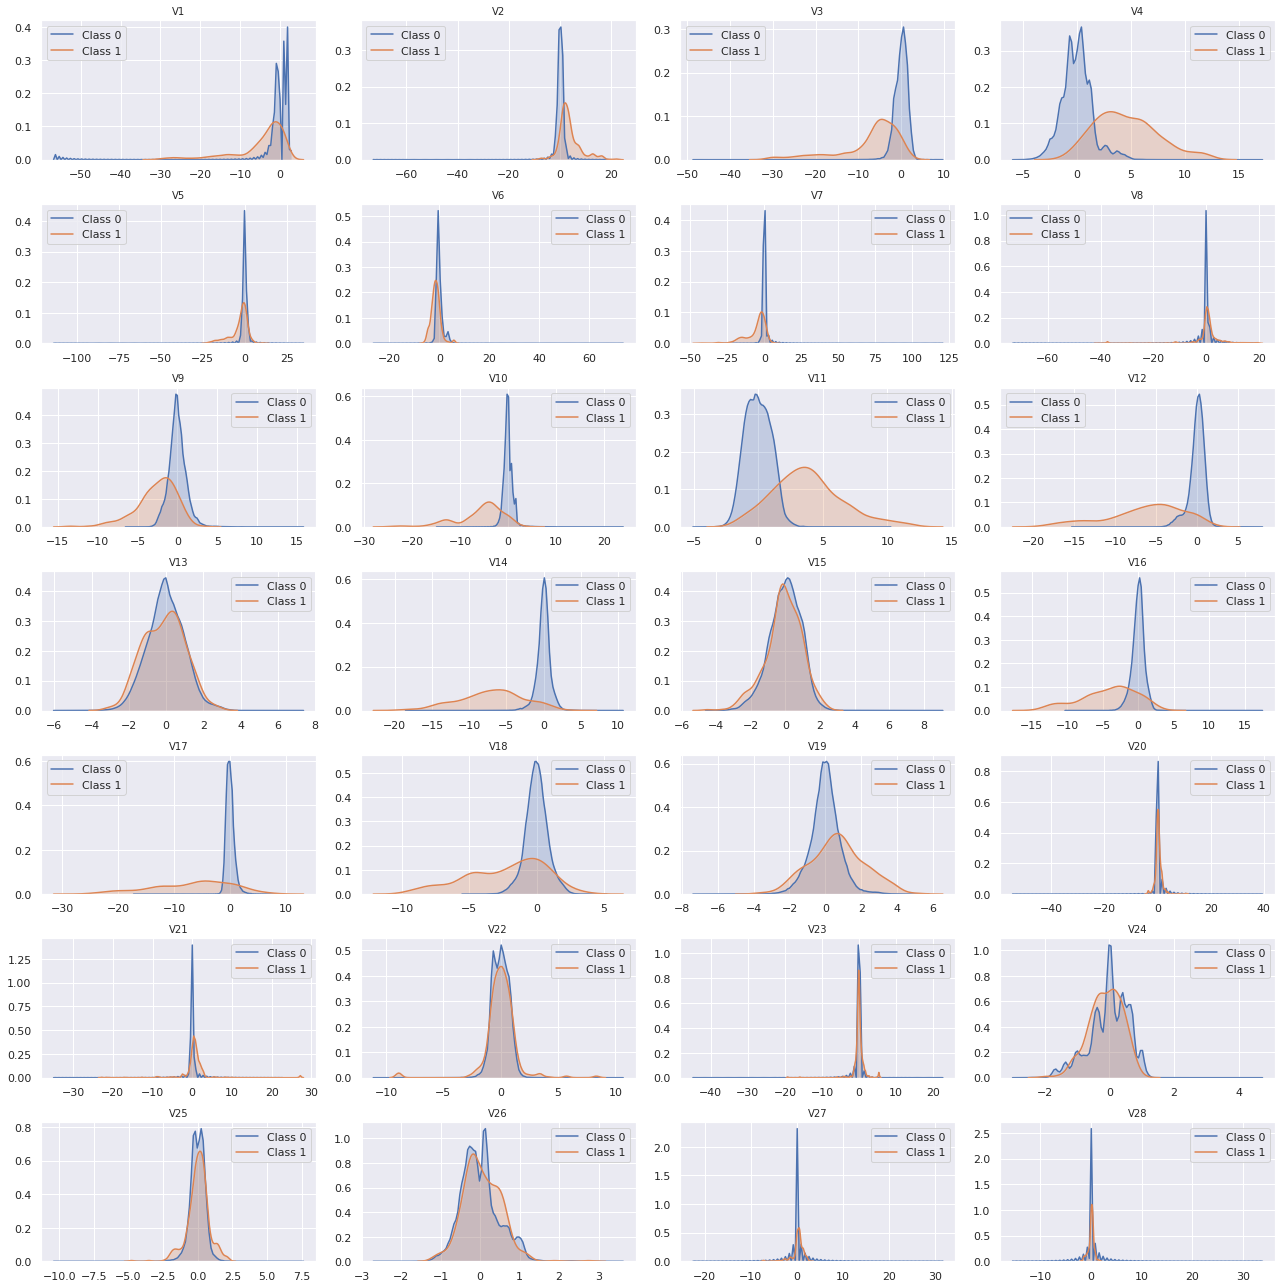

In [ ]:
column_names = df.drop(['Class', 'Amount', 'Time'], axis=1).columns
num_plots = len(column_names)
df_class_0 = df[df.Class == 0]
df_class_1 = df[df.Class == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in column_names:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Class 0", shade=True)
    sns.kdeplot(df_class_1[col], label="Class 1", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()


Como nossos dados estão desbalanceados, observaremos a seguir que o gráfico de correlação não traz nenhuma informação de relevante.

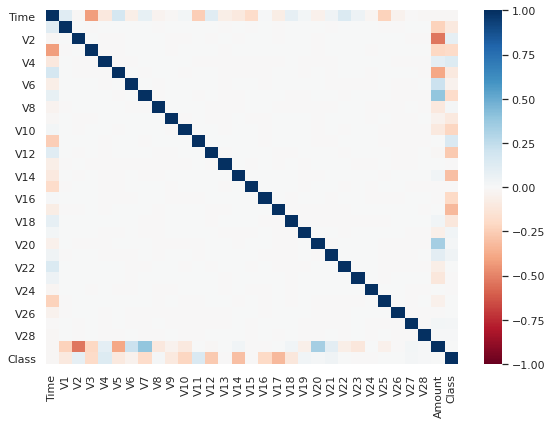

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, cmap='RdBu', vmin=-1)

plt.tight_layout()
plt.show()

#Preparando os dados
Para que os dados possam alimentar os modelos de classificação que iremos construir, nesta etapa de preparação iremos:

* Padronizar as features Time e Amount, que estão em outra ordem de grandeza.
* Dividir entre dados de treino e teste
* Balancear os dados a fim de evitar uma baixa performance para a classe 1 e overfitting.

**1. Padronizar `Time` e `Amount`**

Para esta etapa, será usada a padronização por meio da classe `StandardScaler`.

In [ ]:
# padronizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


**2. Dividir entre conjuntos de treino e teste**

Antes de proceder com o balanceamento de dados, devemos splitar os dados já existentes entre treino e teste. Caso contrário, não teremos parâmetros para conferir se o balanceamento foi adequado. Para garantir que os conjuntos de treino e teste tenham a mesma quantidade de classes proporcionalmente, passamos stratify=True.

* Dados desbalanceados

In [ ]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

# dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

**3. Balanceamento dos dados**

Usando a biblioteca `imblearn` é possível aplicar facilmente técnicas de balanceamento de dados. No caso, a opção neste projeto foi usar **Under-sampling**, preservando a classe minoritária. É fácil ver que não há mais aquela discrepância inicial (gráfico de barras no início deste *notebook*).

1    369
0    369
dtype: int64


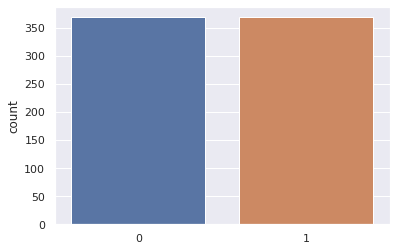

In [ ]:
# usar técnica under-sampling
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_rus);

Com os dados balanceados, podemos ver a matriz de correlação e identificar quais variáveis estão mais fortemente relacionadas com as outras. Observe como anteriormente, sem o balanceamento de dados, a matriz de correlação não trazia nenhuma informação relevante. Entretanto, ela traz muito mais informações após um correto balanceamento.

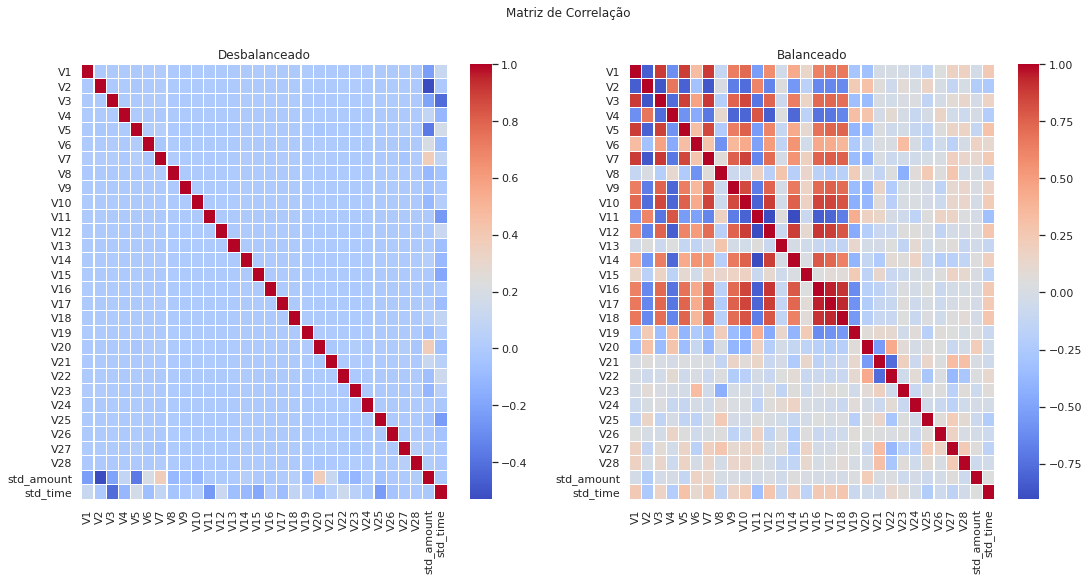

In [ ]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()


fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado')

plt.show()

# Modelo de Machine Learning
Falar sobre o perfil do problema * Construir um modelo para **classificação**.

Serão utilizados nesse projeto os seguintes algorítmos:

*   **Regressão Logística**
*   **SVM**
*   **Random Forest**
*   **Decision Tree**
*   **XGBoost**

Ao final prepararemos uma tabela para comparar de forma mais intuitiva a performance de cada modelo e a definir a escolha daquele que melhor atende aos requisitos deste problema.



### **Regressão Logística**

Com todos os dados preparados e após uma análise exploratória completa, irei construir um classificador usando a Regressão Logística.

Após instanciar o modelo, o mesmo será treinado em cima dos dados em `X_rus` e `y_rus`. Na sequência, serão realizadas as previsões sobre os dados de teste.

In [ ]:
# instanciar e treinar um modelo de Regressão Logística
np.random.seed(2)
LogisticRegressionModel = LogisticRegression()

# Aplicar cross validation
results = cross_val_score(LogisticRegressionModel, X_rus, y_rus, cv = 10, scoring = 'recall')

LogisticRegressionModel.fit(X_rus, y_rus)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71079
           1       0.04      0.90      0.08       123

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.96      0.98     71202



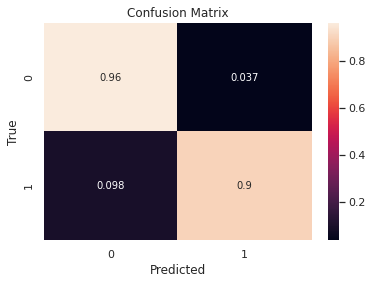

ROC AUC Score: 0.9326


In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred_LR = LogisticRegressionModel.predict(X_test)
y_proba = LogisticRegressionModel.predict_proba(X_test)

# Imprimir relatório 
def report(pred):
    print(classification_report(y_test, y_pred_LR))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_LR, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_LR), 4)}')

report(LogisticRegressionModel)


### **SVM**

In [ ]:
np.random.seed(2)
SVMmodel = SVC()
results = cross_val_score(SVMmodel, X_rus, 
                          y_rus, cv = 10, scoring = 'recall')

SVMmodel.fit(X_rus, y_rus)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.10      0.86      0.17       123

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.58     71202
weighted avg       1.00      0.99      0.99     71202



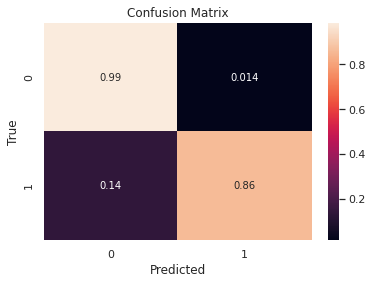

ROC AUC Score: 0.9239


In [ ]:
# fazer as previsões em cima dos dados de teste
y_pred_SVM = SVMmodel.predict(X_test)

# Imprimir relatório 
def report(pred):
    print(classification_report(y_test, y_pred_SVM))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_SVM, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_SVM), 4)}')

report(SVMmodel)

### **Random Forest**

In [ ]:

# criando e treinando o modelo
seed = 2
RandomForestModel = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0, oob_score = 5)

# cross validation Random Forest Classifier
results = cross_val_score(RandomForestModel, X_rus, 
                          y_rus, cv = 5, scoring = 'recall')

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     71079
           1       0.11      0.85      0.19       123

    accuracy                           0.99     71202
   macro avg       0.55      0.92      0.59     71202
weighted avg       1.00      0.99      0.99     71202



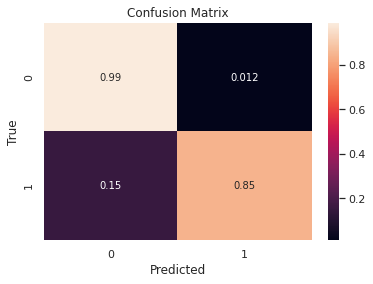

ROC AUC Score: 0.9166


In [ ]:
# fazendo previsões
RandomForestModel.fit(X_rus, y_rus)
y_pred_RF = RandomForestModel.predict(X_test)
y_proba = RandomForestModel.predict_proba(X_test)

# Imprimir relatório 
def report(pred):
    print(classification_report(y_test, y_pred_RF))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_RF, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_RF), 4)}')

report(RandomForestModel)

Identificando as features mais importantes para o resultado do modelo.

In [ ]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(RandomForestModel.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

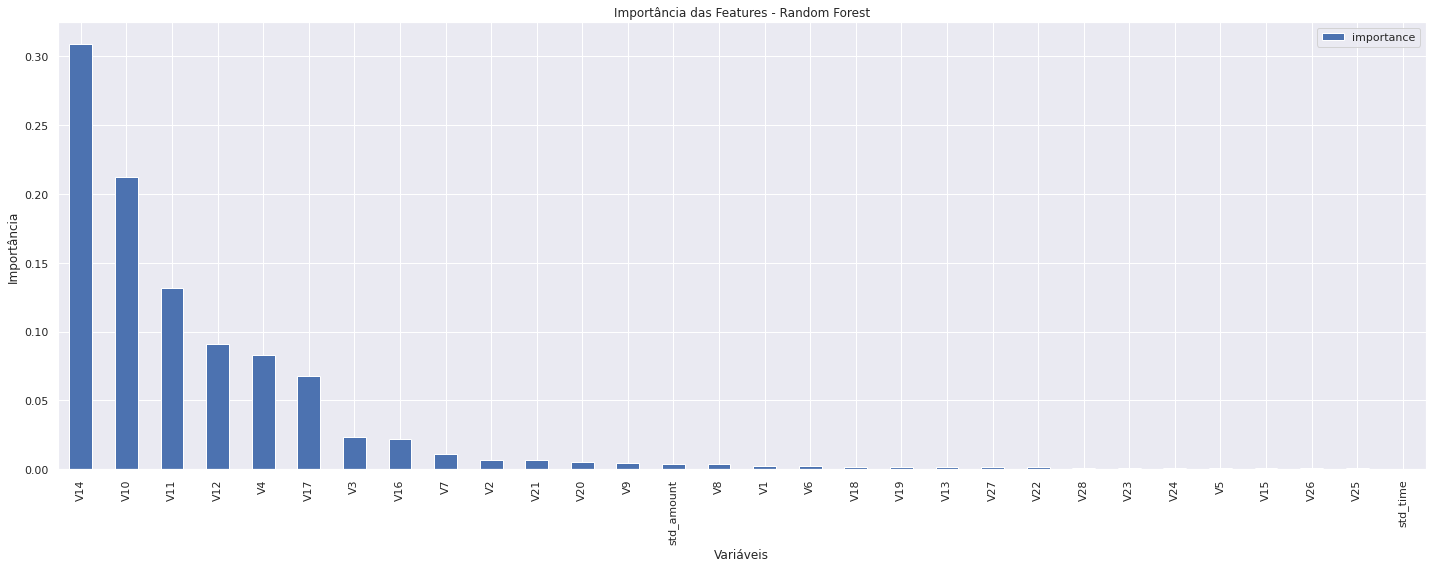

In [ ]:
# plotar o gráfico de barras para variáveis mais importantes
fig, ax = plt.subplots(figsize=(20,8))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Forest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")

plt.tight_layout()

### **Decision Tree**

In [ ]:
DecisionTreeModel = DecisionTreeClassifier(max_depth=4, criterion="entropy")

# Fit do modelo (treinar)
DecisionTreeModel.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.88      0.74      0.81       123

    accuracy                           1.00     71202
   macro avg       0.94      0.87      0.90     71202
weighted avg       1.00      1.00      1.00     71202



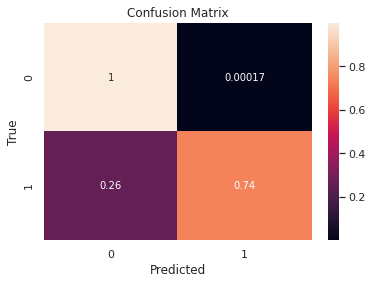

ROC AUC Score: 0.8698


In [ ]:
# fazendo previsões
y_pred_DT = DecisionTreeModel.predict(X_test)

## Imprimir relatório 
def report(pred):
    print(classification_report(y_test, y_pred_DT))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_DT, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_DT), 4)}')

report(DecisionTreeModel)

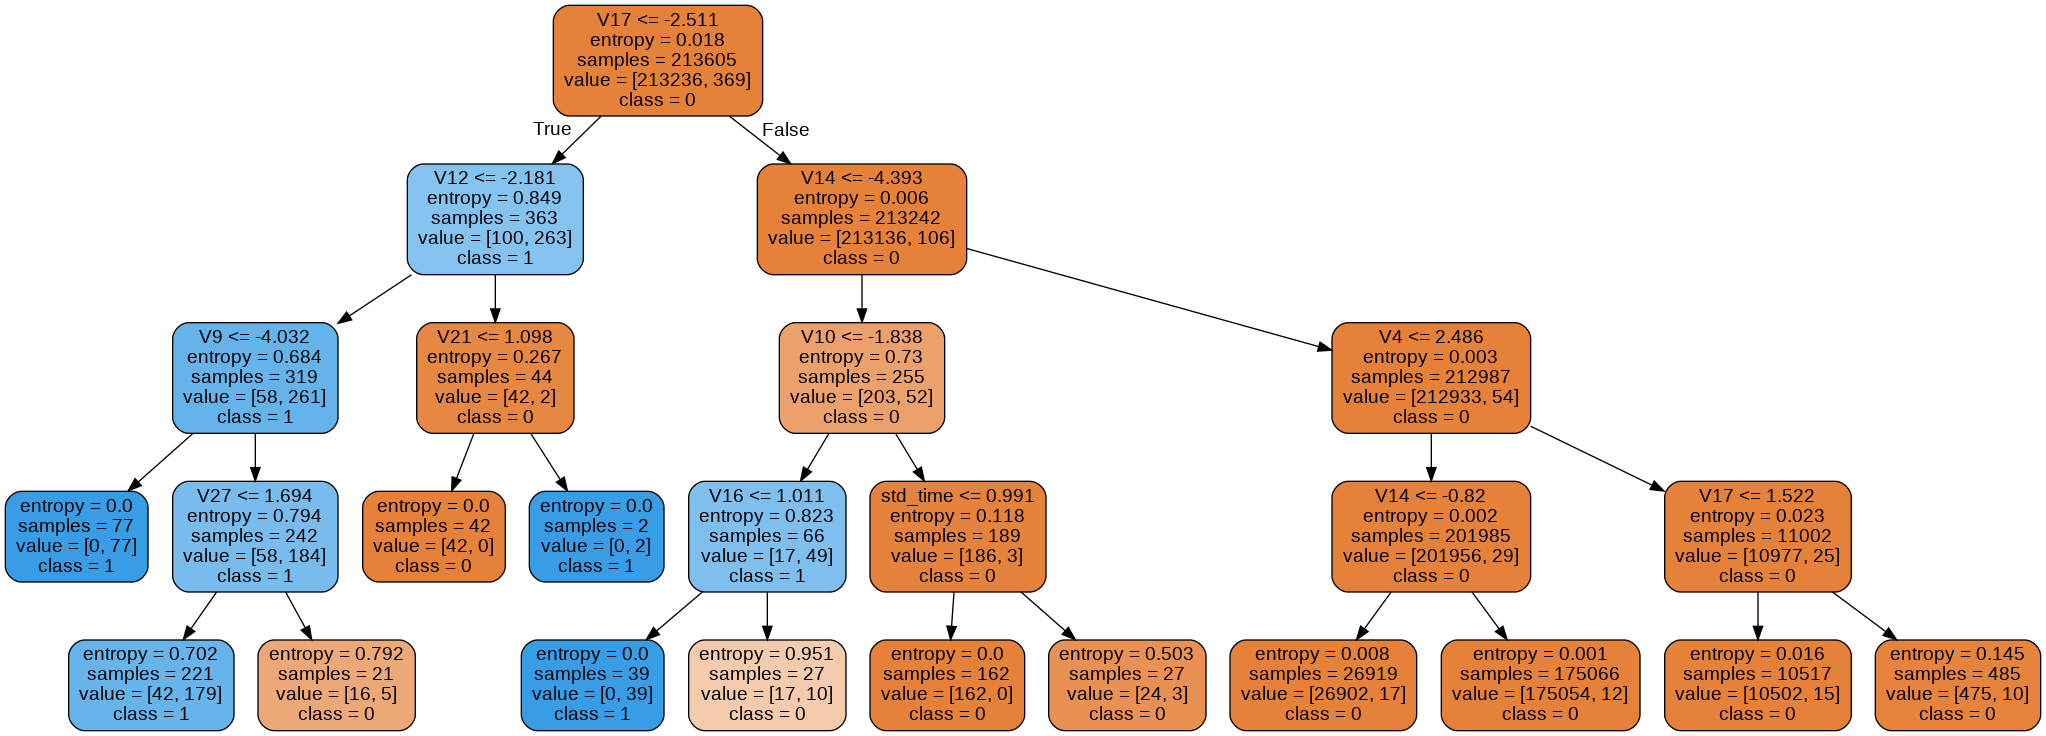

In [ ]:
# criar DOT 
dot = export_graphviz(DecisionTreeModel, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['0', '1'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

## **XGBoost**

In [ ]:
XGBModel = XGBClassifier()

XGBModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71079
           1       0.95      0.74      0.83       123

    accuracy                           1.00     71202
   macro avg       0.97      0.87      0.92     71202
weighted avg       1.00      1.00      1.00     71202



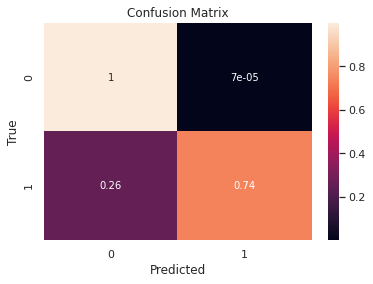

ROC AUC Score: 0.8699


In [ ]:
# fazendo previsões
y_pred_XGB = XGBModel.predict(X_test)

## Imprimir relatório 
def report(pred):
    print(classification_report(y_test, y_pred_XGB))
    fig, ax = plt.subplots()
    sns.heatmap(confusion_matrix(y_test, y_pred_XGB, normalize='true'), annot=True, ax=ax)
    ax.set_title('Confusion Matrix')
    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')

    plt.show()

    print(f'ROC AUC Score: {round(roc_auc_score(y_test, y_pred_XGB), 4)}')

report(XGBModel)

## Avaliar o desempenho do modelo


In [ ]:
Comparacao = pd.DataFrame(data={
'labels': ['Accuracy', 'Precision', 'Recall', 'F1_score', 'roc_auc'],
'LogisticRegressionModel': [accuracy_score(y_test, y_pred_LR), precision_score(y_test, y_pred_LR), recall_score(y_test, y_pred_LR), f1_score(y_test, y_pred_LR), roc_auc_score(y_test, y_pred_LR)],
'SVMModel': [accuracy_score(y_test, y_pred_SVM), precision_score(y_test, y_pred_SVM), recall_score(y_test, y_pred_SVM), f1_score(y_test, y_pred_SVM), roc_auc_score(y_test, y_pred_SVM)],
'RandomForestModel': [accuracy_score(y_test, y_pred_RF), precision_score(y_test, y_pred_RF), recall_score(y_test, y_pred_RF), f1_score(y_test, y_pred_RF), roc_auc_score(y_test, y_pred_RF)],
'XGBoost': [accuracy_score(y_test, y_pred_XGB), precision_score(y_test, y_pred_XGB), recall_score(y_test, y_pred_XGB), f1_score(y_test, y_pred_XGB), roc_auc_score(y_test, y_pred_XGB)],
'DecisionTreeModel': [accuracy_score(y_test, y_pred_DT), precision_score(y_test, y_pred_DT), recall_score(y_test, y_pred_DT), f1_score(y_test, y_pred_DT), roc_auc_score(y_test, y_pred_DT)],
}).set_index('labels')
Comparacao.index.name = None

Comparacao

,LogisticRegressionModel,SVMModel,RandomForestModel,XGBoost,DecisionTreeModel
Accuracy,0.962670,0.985815,0.987402,0.999480,0.999382
Precision,0.040261,0.096451,0.105906,0.947917,0.883495
Recall,0.902439,0.861789,0.845528,0.739837,0.739837
F1_score,0.077083,0.173486,0.188235,0.831050,0.805310
roc_auc,0.932606,0.923909,0.916588,0.869884,0.869834


## Conclusões:

Foram construídos cinco modelos supervisionados de Machine Learning para prever se uma transação utilizando cartão de crédito é ou não fraude:


*   Regressão Logística
*   SVM - Support Vector Machine
*   Random Forest
*   XGBoost
*   Decision Tree

Após analisarmos a tabela comparativa, com o desempenho das métricas de cada um,é possível observar:
1. Todos os modelos apresentam acurácia acima de 95%. Sabemos que a acurácia indica a performance geral do modelo, ou seja dentre todas as classificações quantas o modelo classificou corretamente. No entanto, para esse tipo de problema não é tão interessante analisarmos somente a acurácia, pois podemos nos deparar com um modelo que acertou muito os verdadeiros negativos e nem tanto os verdadeiros positivos que é o nosso real objetivo. Adicionalmente, essa não é uma boa métrica para dados tão desbalanceados como esse dataset.
2. O modelo que apresenta o melhor resultado da curva AUC/ROC é o de **Regressão Logística**, com 0,932 seguido bem de perto do SVM com 0,923. Sabemos que o AUC é uma forma de resumir o valor da curva ROC e demonstra a qualidade do modelo para distinguir entre 0 e 1, quanto mais próximo de 1, demonstra que o modelo consegue distinguir com precisão o binômio.
3. Para um problema de fraudes, precisamos considerar que os **Falsos Negativos** são considerados mais prejudiciais que os **Falsos Positivos**, ou seja, o modelo deve encontrar todos as possíveis transações fraudulentas mesmo que classifique algumas transações normais como fraudulentas. Importante que o resultado do recall seja alto pois classificar transações normais como fraudulentas poderá gerar muito desgaste com os clientes. Desta forma, observa-se que o modelo de **Regressão Logística** é aquele que apresenta um resultado consideravelmente melhor que os demais modelos, com 0,90.
Com base nas análises das métricas acima, recomendamos a utilização do modelo de classificação **Regressão Logística**.


* *Lembrete*:


**Verdadeiros Positivos:** classificação correta da classe Positivo, ou seja, você previu positivo e acertou. Ex: Você previu que uma mulher está grávida e ela realmente está.

**Verdadeiros Negativos:** classificação correta da classe Negativo, ou seja, você previu negativo e acertou. Ex: Você previu que um homem não está grávido e ele realmente não está.

**Falsos Positivos (Erro Tipo I):** erro em que o modelo previu a classe Positivo quando o valor real era classe Negativo, ou seja, você previu positivo e errou.Ex: Você previu que um homem está grávido, mas na verdade ele não está.

**Falsos Negativos (Erro Tipo II):** erro em que o modelo previu a classe Negativo quando o valor real era classe Positivo, ou seja, você previu negativo e errou. Ex: Você previu que uma mulher não está grávida, mas ela realmente está.








###### Referência para paletas de cores: https://xkcd.com/color/rgb/ 